## <span style="color:green">  ESERCITAZIONE 5</span>

### <span style="color:blue">  Esercizio 05.1</span>
<span style="color:blue"> Calcola il raggio medio $\left\langle r \right\rangle$ dell'atomo di idrogeno, per lo stato fondamentale $1s$ e per il primo stato eccitato $2p$.</span>

L'obiettivo di questo esperimento è calcolare il raggio medio dell'atomo di idrogeno, per lo stato fondamentale e per il primo stato eccitato. L'atomo di idrogeno è costituito da un nucleo e da un elettrone che si muove attorno al nucleo. L'elettrone si dispone nello spazio secondo la descrizione data dalla funzione d'onda $\Psi(\vec{r},t)$ che indica l'ampiezza di probabilità secondo cui l'elettrone al tempo $t$ si trovi nella posizione $\vec{r}$. Il modulo quadro della funzione d'onda, $|\Psi(\vec{r},t)|^2$, rappresenta la **densità di probabiltà** che l'elettrone al tempo $t$ si trovi nella posizione $\vec{r}$. 

Nel testo dell'esercizio vengono fornite le funzioni d'onda per lo stato fondamentale e per il primo stato eccitato. A partire da queste, possiamo calcolare le densità di probabilità e quindi campionarle con i metodi Monte Carlo. Per questo esercizio usiamo **l'algoritmo di Metropolis**. 

### Algoritmo di Metropolis

Si tratta di una tecnica di rigetto: viene estratta una possibile mossa, dopodiché l'algoritmo decide se accettarla o meno. Vengono calcolate la probabilità dello stato in cui si trova il sistema e la probabilità dello stato in cui vorrei che il sistema andasse. Se lo **stato nuovo è più probabile** dello stato attuale, la **particella si sposta**, altrimenti resta dove si trova e ripesa la posizione. L'equazione che descrive il rapporto tra le due probabilità è: 

\begin{equation}
   A(x|y) = min\left[1,\frac{T(x|y)p(x)}{T(y|x)p(y)}\right]
\end{equation}

$T(x|y)$ e $T(y|x)$ sono le probabilità di transizione rispettivamente da x a y e da y a x che sono uguali, in seguito all'ipotesi di ergodicità del sistema, quindi si semplificano. Abbiamo scelto $T(x|y)$ e $T(y|x)$ tale da ottenere il $50\%$ di accettazione dei punti estratti. $p(x)$ e $p(y)$ sono le probabiltà di trovarsi nello stato nuovo e stato di partenza: in questo caso sono le funzioni d'onda al quadrato, a cui sostituiamo rispettivamente il raggio della nuova posizione e di quella attuale. Facendo il **rapporto tra le probabilità**, i coefficienti si semplificano. L'algoritmo funziona secondo la seguente logica. 
1. Parti da un punto iniziale sensato. 
2. Estrai un punto secondo la distribuzione di probabilità richiesta: è qui che vorresti andare.
3. Calcola il rapporto tra le probabilità del punto nuovo e del punto attuale.
4. Calcola $\alpha$, il minimo tra $1$ e questo rapporto: se ottieni $1$, vuol dire che la nuova posizione è più probabile.
5. Estrai un valore in una distribuzione uniforme $[0,1)$ e confrontalo col valore ottenuto prima.
6. Se il valore della distribuzione uniforme è minore di $\alpha$, vuol dire che il nuovo punto è più probabile e spostati qui: per $\alpha=1$ questo succede sempre. 
7. Se il valore della distribuzione uniforme è maggiore di $\alpha$, rigetta la mossa, rimani dove sei e ripesa la posizione. 
8. La posizione nuova adesso è il punto iniziale: ripeti il processo a partire da questa posizione.

### Rapporto tra le densità di probabilità

Le funzioni d'onda per i due stati sono date nel testo dell'esercizio. Il codice calcola il **rapporto tra le densità di probabilità tra stato nuovo e stato vecchio**. 

Il rapporto delle densità di probabilità per lo stato $1s$ è:
\begin{equation}
  \frac{|\Psi_{new}|^2}{|\Psi_{old}|^2} = \exp\left[\frac{2}{a_{0}} \left(r_{old}-r_{new}\right)\right].
\end{equation}

Il rapporto delle densità di probabilità per lo stato $2p$ è:
\begin{equation}
  \frac{|\Psi_{new}|^2}{|\Psi_{old}|^2} = \frac{z^{2}_{new}}{z^{2}_{old}} \exp\left[\frac{1}{a_{0}} \left(r_{old}-r_{new}\right)\right].
\end{equation}

Nel fare la sostituzione per lo stato $2p$ ho usato la relazione: $$\cos(\theta)=\frac{z}{r}.$$

### Distanza

Campionando la densità di probabilità, otteniamo dei punti in cui l'elettrone potrebbe trovarsi. Il codice estrae le coordinate cartesiane, dopodiché calcola la distanza punto-origine. Quello che noi vorremmo fare in questo esercizio è calcolare la distanza media tra questi punti e l'origine, per lo stato $1s$ e per lo stato $2p$ dell'atomo di idrogeno. Sappiamo che, in unità del raggio di Bohr $a_{0}$, queste distanze valgono, per i due casi:
\begin{equation}
   \left\langle r \right\rangle_{\Psi_{1,0,0}} = \frac{3}{2}a_0
   \quad \quad
   \left\langle r \right\rangle_{\Psi_{2,1,0}} = 5 a_0
\end{equation}

Per calcolare sia la distanza sia la relativa incertezza, utilizziamo il metodo della media a blocchi, come per gli esercizi precedenti. Ogni blocco contiene $L=10^{4}$ eventi, ossia distanze $\left\langle r \right\rangle$ e ripetiamo il processo per $N=100$ blocchi. Il numero totale di distanze punto-origine è $M=10^{6}$.

Come punto di partenza, ho deciso di non scegliere lo $0$ in entrambi i casi perché:
1. per $1s$ è il punto il cui la funzione d'onda ha il massimo; 
2. per $2p$ è il punto il cui la funzione d'onda si annulla.

Ho deciso di partire da due punti contemplati dalle funzioni d'onda, ma che non siano troppo vicini ai punti più o per niente probabili. Ho scelto per:
1. $1s$, un punto distante $a_{0}$ dall'origine, con $x=y=z$; 
2. $2p$, un punto distante $5a_{0}$ dall'origine, con $x=y=z$.

Ho lavorato in unità del raggio di Bohr, quindi ho posto: $a_{0}=1$. Di conseguenza i valori a cui convergono i raggi durante la simulazione sono: $\left\langle r \right\rangle_{\Psi_{1,0,0}}=1.5$ e $\left\langle r \right\rangle_{\Psi_{2,1,0}}=5$. Nei grafici successivi sono riportate le distanze ottenute con il metodo della media a blocchi, con le rispettive incertezze.

<span style="color:blue"> 1. Raggio medio $\left\langle r \right\rangle$ dell'atomo di idrogeno, per lo stato fondamentale $1s$ e per il primo stato eccitato $2p$.</span>

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

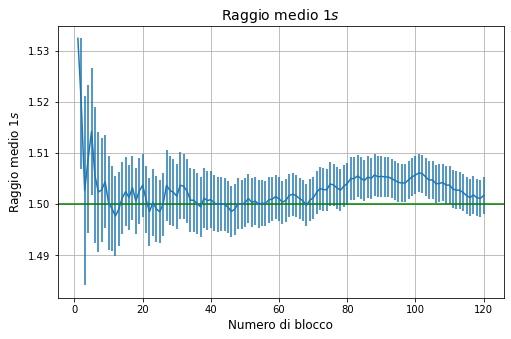

In [2]:
x, f, error = np.loadtxt("raggi_1s.dat", usecols=(0,1,2), delimiter='  ', unpack='true')
fig = plt.figure(figsize=(8,5))
plt.errorbar(x,f,yerr=error)

plt.axhline(y=1.5, color='green')
plt.xlabel('Numero di blocco', fontsize=12)
plt.ylabel('Raggio medio $1s$', fontsize=12)

plt.title('Raggio medio $1s$', fontsize=14)
plt.grid(True)
plt.show()

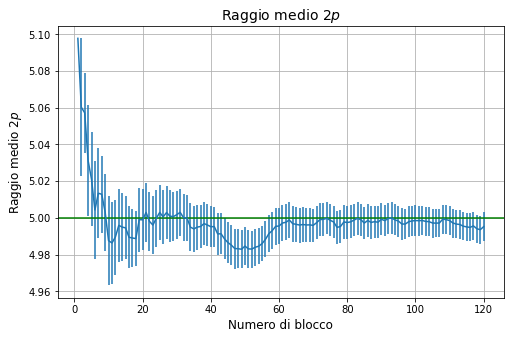

In [3]:
x, f, error = np.loadtxt("raggi_2p.dat", usecols=(0,1,2), delimiter='  ', unpack='true')
fig = plt.figure(figsize=(8,5))
plt.errorbar(x,f,yerr=error)

plt.axhline(y=5.0, color='green')
plt.xlabel('Numero di blocco', fontsize=12)
plt.ylabel('Raggio medio $2p$', fontsize=12)

plt.title('Raggio medio $2p$', fontsize=14)
plt.grid(True)
plt.show()

Questi grafici riportano i risultati dopo aver fatto l'**equilibrazione**. Ho eseguito in un primo momento il codice e ho osservato che, su $M=10^{6}$, la curva diventa più vicina alla linea teorica dopo aver generato $M=2\times 10^{5}$ valori, ossia la curva qui si equilibra. Allora ho riscritto il codice per introducendo la funzione di equilibrazione. I blocchi di equilibrazione sono $20$ di $10^{4}$ eventi ciascuno. Dopodiché inizia la simulazione vera e propria per $120$ blocchi. Nei grafici sono riportati i $120$ blocchi per cui l'equilibrazione è avvenuta. Osserviamo che la convergenza è buona: le barre di errore intersecano la linea del valore teorico per il $75\%$ delle volte. L'incertezza statistica è dell'ordine di $10^{-3}$: molto piccola. L'esperimento può dirsi riuscito.

<span style="color:blue"> 2. Raggio medio $\left\langle r \right\rangle$ dell'atomo di idrogeno, per lo stato fondamentale $1s$ e per il primo stato eccitato $2p$ partendo da molto lontano.</span>

Abbiamo ripetuto l'esercizio partendo da molto lontano, in questo caso da $100$ volte la distanza iniziale. I grafici sono sia per lo stato $1s$, sia per lo stato $2p$.

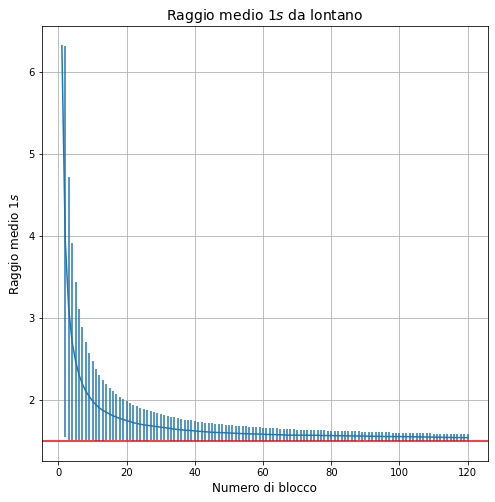

In [4]:
x, f, error = np.loadtxt("raggi_1s_far.dat", usecols=(0,1,2), delimiter='  ', unpack='true')
fig = plt.figure(figsize=(8,8))
plt.errorbar(x,f,yerr=error)

plt.axhline(y=1.5, color='red')
plt.xlabel('Numero di blocco', fontsize=12)
plt.ylabel('Raggio medio $1s$', fontsize=12)

plt.title('Raggio medio $1s$ da lontano', fontsize=14)
plt.grid(True)
plt.show()

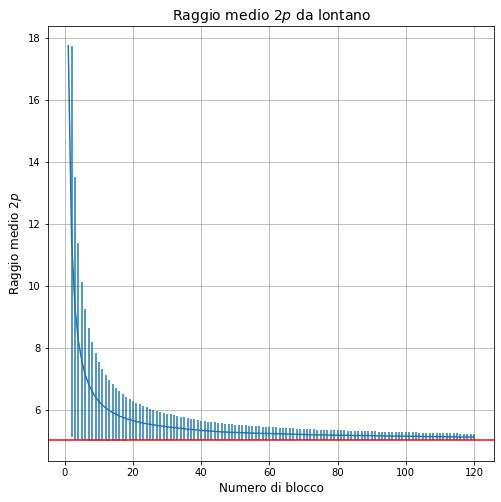

In [5]:
x, f, error = np.loadtxt("raggi_2p_far.dat", usecols=(0,1,2), delimiter='  ', unpack='true')
fig = plt.figure(figsize=(8,8))
plt.errorbar(x,f,yerr=error)

plt.axhline(y=5.0, color='red')
plt.xlabel('Numero di blocco', fontsize=12)
plt.ylabel('Raggio medio $2p$', fontsize=12)

plt.title('Raggio medio $2p$ da lontano', fontsize=14)
plt.grid(True)
plt.show()

Il valore sperimentale converge a livello teorico, ma questo è **correlato**. La curva è monotona decrescente. Le punte superiori delle barre di errore seguono il profilo della curva sperimentale, invece le punte inferiori toccano la linea del valore teorico. Le barre di errore sono due ordini di grandezza più grandi rispetto al caso precedente. Questo comportamento anomalo può essere giustificato dal fatto che, rispetto al caso precedente, stiamo lavorando su una scala due ordini di grandezza superiore, $100 a_{0}$ invece di $a_{0}$. In questo caso il random walker sa di partire da molto lontano e sa dove deve arrivare, di conseguenza per **avvicinarsi** al punto finale desiderato fa dei passi decisi. La posizione in cui si trova all'inizio sicuramente non va bene e sa che deve fare solo passi in avanti verso il nucleo dell'atomo. Quando egli arriva molto vicino al nucleo, è nella scala giusta del problema e fa delle oscillazioni intorno al nucleo.

<span style="color:blue"> 3. Raggio medio $\left\langle r \right\rangle$ dell'atomo di idrogeno, per lo stato fondamentale $1s$ e per il primo stato eccitato $2p$, estraendo i punti da una distribuzione Gaussiana.</span>

Abbiamo ripetuto l'esercizio estraendo i punti da una distribuzione Gaussiana e non da quella uniforme. Il punto iniziale è lo stesso del punto 1: vorremmo osservare che non ci sia troppa differenza tra questi due casi. I grafici sono sia per lo stato $1s$, sia per lo stato $2p$.

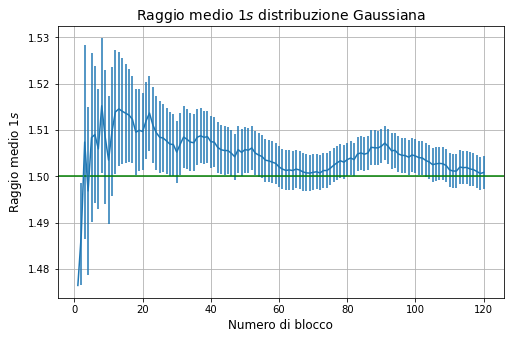

In [6]:
x, f, error = np.loadtxt("raggi_1s_nor.dat", usecols=(0,1,2), delimiter='  ', unpack='true')
fig = plt.figure(figsize=(8,5))
plt.errorbar(x,f,yerr=error)

plt.axhline(y=1.5, color='green')
plt.xlabel('Numero di blocco', fontsize=12)
plt.ylabel('Raggio medio $1s$', fontsize=12)

plt.title('Raggio medio $1s$ distribuzione Gaussiana', fontsize=14)
plt.grid(True)
plt.show()

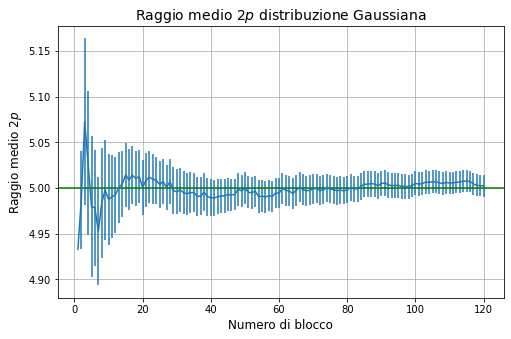

In [7]:
x, f, error = np.loadtxt("raggi_2p_nor.dat", usecols=(0,1,2), delimiter='  ', unpack='true')
fig = plt.figure(figsize=(8,5))
plt.errorbar(x,f,yerr=error)

plt.axhline(y=5.0, color='green')
plt.xlabel('Numero di blocco', fontsize=12)
plt.ylabel('Raggio medio $2p$', fontsize=12)

plt.title('Raggio medio $2p$ distribuzione Gaussiana', fontsize=14)
plt.grid(True)
plt.show()

I grafici non sono identici a quelli del punto $1$ ma l'andamento è simile: c'è sempre l'oscillazione dei valori sperimentali rispetto alla linea teorica. Le barre di errore hanno ordine di grandezza $10^{-3}$ per il caso $1s$, come per il punto $1$ e $10^{-2}$ per il caso $2p$, uno in più rispetto al punto $1$: la precisione è minore ma è sempre buona. Il valore teorico viene intersecato dalle barre di errore per il $50\%$ delle volte nel caso $1s$ e per il $100\%$ delle volte nel caso $2p$. Questo è dovuto alla diversa lunghezza delle barre di errore. In entrambi i casi la convergenza è buona.

### Punti

Infine propongo i grafici $3D$ con due esempi di punti estratti per gli stati $1s$ e $2p$. Sono i punti estratti dal codice mentre eseguiva l'ultimo ciclo.

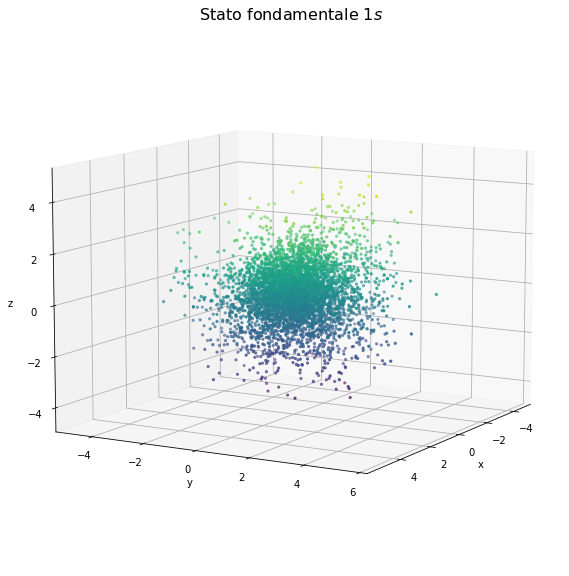

In [5]:
X, Y, Z = np.loadtxt("coordinate_1s.dat", usecols=(0,1,2), delimiter='  ', unpack='true')

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(X, Y, Z, c=Z, marker='.')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.view_init(10, 30)
plt.title('Stato fondamentale $1s$', fontsize=16)
plt.show()

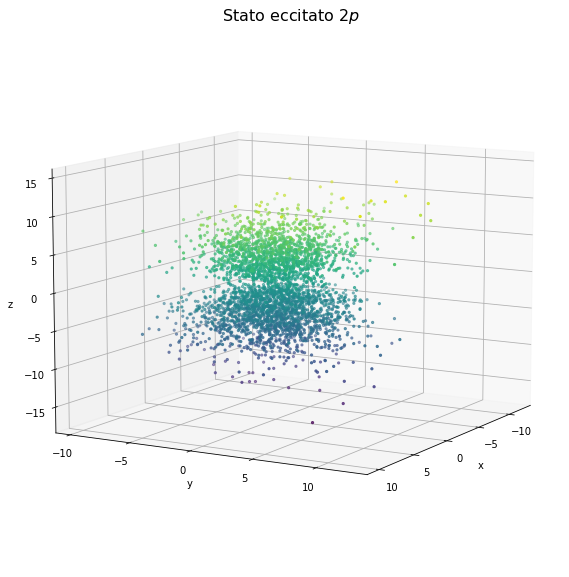

In [6]:
X, Y, Z = np.loadtxt("coordinate_2p.dat", usecols=(0,1,2), delimiter='  ', unpack='true')

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(X, Y, Z, c=Z, marker='.')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.view_init(10, 30)
plt.title('Stato eccitato $2p$', fontsize=16)
plt.show()

Notiamo che i raggi hanno lunghezza media $1.5$ in $1s$ e $5$ in $2p$. Osserviamo che la forma dello stato $1s$ è una sfera e che la forma di $2p$ sono due lobi disposti lungo l'asse z. La forma è quella prevista dalla teoria: l'esperimento è riuscito.

Qui sotto vediamo che forma hanno gli stati $1s$ e $2p$ rispettivamente partendo da molto lontano e da una distribuzione Gaussiana.

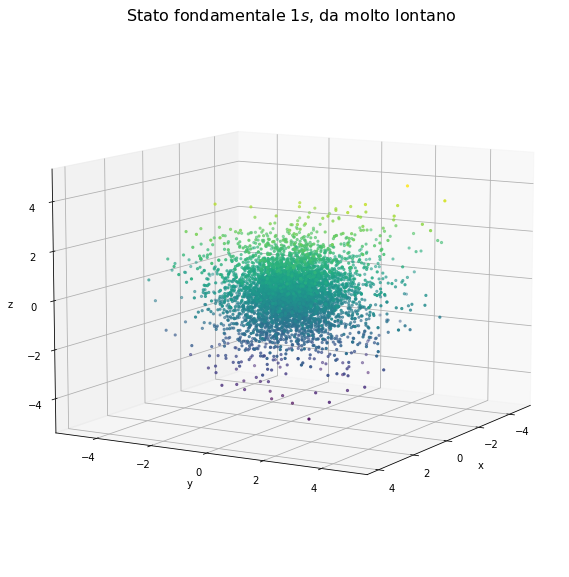

In [10]:
X, Y, Z = np.loadtxt("coordinate_1s_far.dat", usecols=(0,1,2), delimiter='  ', unpack='true')

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(X, Y, Z, c=Z, marker='.')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.view_init(10, 30)
plt.title('Stato fondamentale $1s$, da molto lontano', fontsize=16)
plt.show()

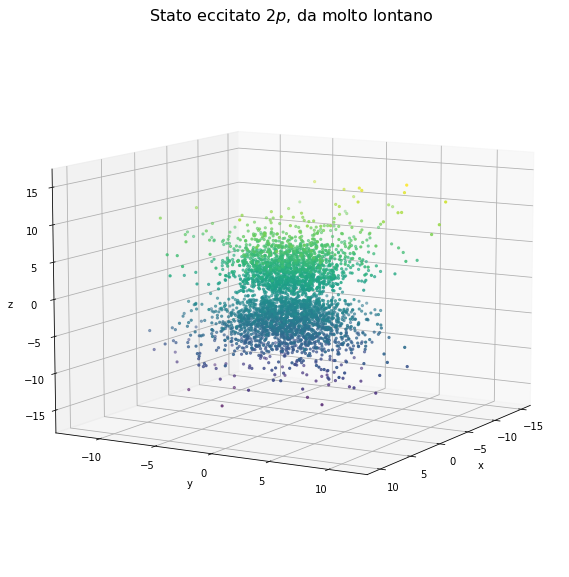

In [12]:
X, Y, Z = np.loadtxt("coordinate_2p_far.dat", usecols=(0,1,2), delimiter='  ', unpack='true')

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(X, Y, Z, c=Z, marker='.')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.view_init(10, 30)
plt.title('Stato eccitato $2p$, da molto lontano', fontsize=16)
plt.show()

Come per il caso precedente, lo stato $1s$ ha la forma di una sfera mentre lo stato $2p$ ha la forma di due lobi. I raggi sono gli stessi per i due casi.

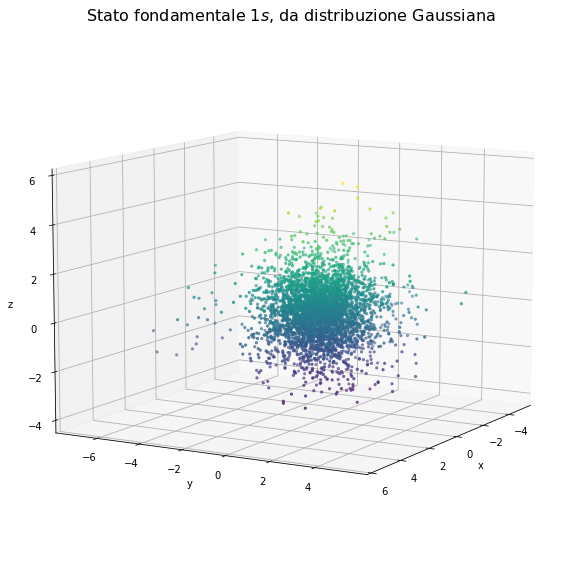

In [13]:
X, Y, Z = np.loadtxt("coordinate_1s_nor.dat", usecols=(0,1,2), delimiter='  ', unpack='true')

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(X, Y, Z, c=Z, marker='.')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.view_init(10, 30)
plt.title('Stato fondamentale $1s$, da distribuzione Gaussiana', fontsize=16)
plt.show()

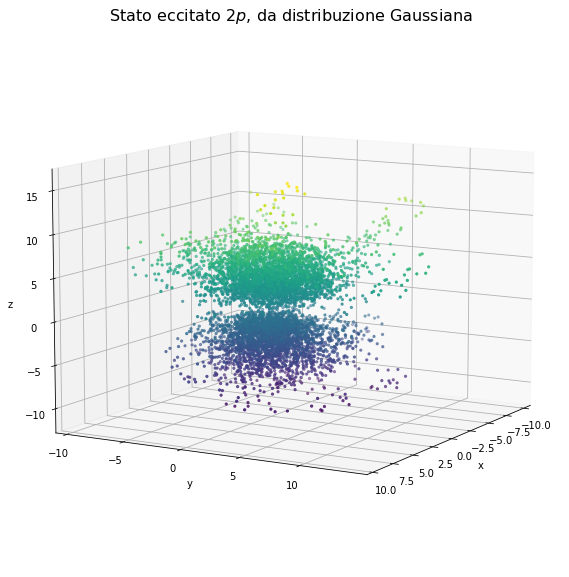

In [14]:
X, Y, Z = np.loadtxt("coordinate_2p_nor.dat", usecols=(0,1,2), delimiter='  ', unpack='true')

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(X, Y, Z, c=Z, marker='.')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.view_init(10, 30)
plt.title('Stato eccitato $2p$, da distribuzione Gaussiana', fontsize=16)
plt.show()

Queste due figure di $1s$ e di $2p$ hanno la stessa forma e le stesse dimensioni del caso iniziale, ma sono un po'più estese: è come se la sfera e i due lobi fossero costituiti di più punti o distribuiti su una superficie più grande. Entrambe le distribuzioni sono in linea con le aspettative per i due stati.